In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, math

In [3]:
tresh_min = 150
tresh_max = 255

In [4]:
image = cv2.imread('../big_au/sample1/D6_0_7081.jpg')
im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
con_sq = contours[0].squeeze()

In [9]:
con_trans = con_sq.transpose()

In [15]:
temp_rect = np.zeros((4,2), dtype = "float32")
temp_rect[0] = con_sq[con_trans[1].argmin()]
temp_rect[1] = con_sq[con_trans[0].argmax()]
temp_rect[2] = con_sq[con_trans[1].argmax()]
temp_rect[3] = con_sq[con_trans[0].argmin()]

In [17]:
maxWidth = 100
maxHeight = 120

# Create destination array, calculate perspective transform matrix,
# and warp card image
dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
M = cv2.getPerspectiveTransform(temp_rect2,dst)
warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)

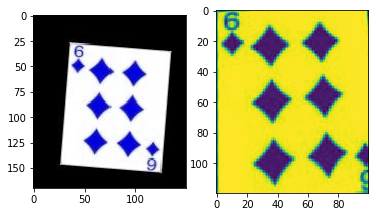

In [22]:
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(warp)

In [48]:
def perspective(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    con_sq = contours[0].squeeze()
    con_trans = con_sq.transpose()
    temp_rect = np.zeros((4,2), dtype = "float32")
    temp_rect[0] = con_sq[con_trans[1].argmin()]
    temp_rect[1] = con_sq[con_trans[0].argmax()]
    temp_rect[2] = con_sq[con_trans[1].argmax()]
    temp_rect[3] = con_sq[con_trans[0].argmin()] # temp_rect에 좌상, 우상, 우하, 좌하 순서로 담김
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    
    # plt imshow로 그림그려줌
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(warp,cmap='gray')
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

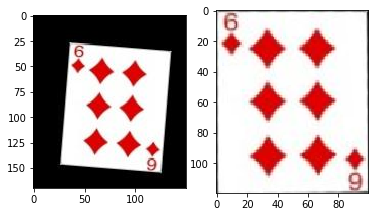

In [45]:
warp_img, rect = perspective('../big_au/sample1/D6_0_7081.jpg')

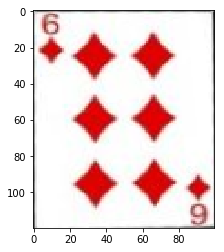

In [46]:
plt.imshow(warp_img)

In [47]:
rect

array([[ 36.,  27.],
       [135.,  35.],
       [124., 154.],
       [ 26., 144.]], dtype=float32)